#### Loading important libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import squarify
import warnings
warnings.filterwarnings("ignore")

#### Loading Data

In [44]:
df_import = pd.read_csv('2018-2010_import.csv')
df_export = pd.read_csv('2018-2010_export.csv')

In [45]:
df_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [46]:
df_export.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


**UNDERSTANDING COLUMNS**

In both the File we have 5 columns each.
* HSCode - HS stands for Harmonized System. It was developed by the WCO (World Customs Organization) as a multipurpose international product nomenclature that describes the type of good that is shipped
    The HS code can be described as follows:

    It is a six-digit identification code.
    It has 5000 commodity groups.
    Those groups have 99 chapters.
    Those chapters have 21 sections.
    It’s arranged in a legal and logical structure.
    Well-defined rules support it to realize uniform classification worldwide.
    
   the HSCode in column is 99 chapters 
   
   [Reference](https://www.tradefinanceglobal.com/freight-forwarding/what-is-an-hs-code/)
   [HSCode List  ](http://www.cybex.in/HS-Codes/Default.aspx)
   
   
* Commodity is an economic good or service that has full or substantial fungibility: that is, the market treats instances of the good as equivalent or nearly so with no regard to who produced them.

* Value - values for export and import of commodities in million US $.

* Country - Country Imported From/ Exported To.

* Year - Year in which comodities where Imported/Exported which is in between 2010 to 2018.

In [47]:
df_import.describe()

,HSCode,value,year
count,76124.000000,64536.000000,76124.000000
mean,53.905023,62.361425,2014.018299
std,27.546852,666.327177,2.579385
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.370000,2014.000000
75%,78.000000,4.780000,2016.000000
max,99.000000,32781.570000,2018.000000


* Value having a huge outlier as 75 % of data is below 4.7 and maximum is 32781 looks like some of the item categories are very expensive, also minimum is 0.00 as some export may be two small to roundoff in two decimal.
* In value column difference between mean and 50% makes obvious of the presence of outliers.
* Year as we expected is between 2010 & 2018

In [48]:
df_export.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


* Value having a huge outlier as 75 % of data is below 3.77 and maximum is 19805 looks like some of the item categories are very expensive, also minimum is 0.00 as some import may be two small to roundoff in two decimal.
* In value column difference between mean and 50% makes obvious of the presence of outliers.
* Year as we expected is between 2010 & 2018

*We'll separate continuous features and discrete features for future usage if needed*

In [49]:
df_imp_num_var = df_import.loc[:,(df_import.dtypes == 'float64') | (df_import.dtypes == 'int64')]
df_exp_num_var = df_export.loc[:,(df_export.dtypes == 'float64') | (df_export.dtypes == 'int64')]
df_imp_cat_var = df_import.loc[:,(df_import.dtypes == 'O')]
df_exp_cat_var = df_export.loc[:,(df_export.dtypes == 'O')]

In [50]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76124 entries, 0 to 76123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     76124 non-null  int64  
 1   Commodity  76124 non-null  object 
 2   value      64536 non-null  float64
 3   country    76124 non-null  object 
 4   year       76124 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [51]:
df_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     137023 non-null  int64  
 1   Commodity  137023 non-null  object 
 2   value      122985 non-null  float64
 3   country    137023 non-null  object 
 4   year       137023 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


**Obsevations**
* Import dataset has 76124 rows of data
* Export dataset has 137023 rows of data
* Both Import & Export contains substantial Null values

**Data Wrangling**

We need to clean the data for better visualization

**Number of UNSPECIFIED in categorical features**

In [52]:
df_imp_cat_var[df_imp_cat_var == "UNSPECIFIED"].count()

Commodity      0
country      794
dtype: int64

In [53]:
df_exp_cat_var[df_exp_cat_var == "UNSPECIFIED"].count()

Commodity      0
country      726
dtype: int64

**Number of null values**

In [54]:
df_import.isnull().sum()

HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64

In [55]:
df_export.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

#### Finding mode values to replace 'UNSPECIFIED' with mode.

In [56]:
mode1 = df_import['country'].mode()
mode1 = mode1[0]
mode2 = df_export['country'].mode()
mode2 = mode2[0]
print(mode1,' & ',mode2)

BELGIUM  &  U ARAB EMTS


#### Now replacing 

In [57]:
df_import['country'] = df_import['country'].replace(['UNSPECIFIED'],mode1)
df_export['country'] = df_export['country'].replace(['UNSPECIFIED'],mode2)

#### Let us handle null values 

We can't replace null values with mean due to the presence of outliers so we'll stick with median here.

In [58]:
median1 = df_import['value'].median()
median2 = df_export['value'].median()

In [59]:
df_import['value'] = df_import['value'].fillna(median1)
df_export['value'] = df_export['value'].fillna(median2)

#### Commodity Analysis

In [60]:
print("Import Commodity Count : "+str(len(df_import['Commodity'].unique())))
print("Export Commodity Count : "+str(len(df_export['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


Why is there 98 Commodity count whereas 99 chapters as discussed above?

I printed all the HSCode and found out that code 77 is missing.
* HSCode 77 is actually reserved for Possible Future Use.

You can refer this link for more information: [HSCode-77 ](http://www.cybex.in/HS-Codes/Reserved-Possible-Future-Use-Chapter-77.aspx)

#### *Lets count the most popular import Commodity . popular just as no of transactions(country/year) are more for this category.*

In [61]:
df = pd.DataFrame(df_import['Commodity'].value_counts())
df.head(20)

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1778
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1711
MISCELLANEOUS GOODS.,1533
PLASTIC AND ARTICLES THEREOF.,1525
IRON AND STEEL,1502
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1418
ALUMINIUM AND ARTICLES THEREOF.,1405
ARTICLES OF IRON OR STEEL,1329
COPPER AND ARTICLES THEREOF.,1245
RUBBER AND ARTICLES THEREOF.,1207


In [62]:
print('No. of Countries India is importing:',len(df_import['country'].unique()))
print('No. of Countries India is exporting:',len(df_export['country'].unique()))

No. of Countries India is importing: 241
No. of Countries India is exporting: 247


### *Analyzing import & export yearly*

In [63]:
yearly_import = df_import.groupby('year').agg({'value':'sum'})
yearly_export = df_export.groupby('year').agg({'value':'sum'})

In [64]:
yearly_import['Trade_Deficit'] = yearly_export.value - yearly_import.value

In [65]:
yearly_import

,value,Trade_Deficit
year,,
2010,370147.79,-119767.01
2011,489803.17,-183318.49
2012,491299.13,-190338.45
2013,450688.05,-135757.28
2014,448485.06,-137567.16
2015,413062.19,-150217.29
2016,384811.31,-108405.80
2017,466009.88,-161971.03
2018,514537.90,-183928.82


#### OBSERVATIONS
* We can see that Import is always more than the Export hence creating trade deficit (i.e. Buying is way more than Selling)
* In year 2011, 2012 and 2018 biggest trade deficit can be seen
* From 2013 to 2016 trade deficit started gradually decreasing which againg increased in 2017 an 2018.

## *Let's plot a graph using seaborn library for better visualization*

In [66]:
import seaborn as sns

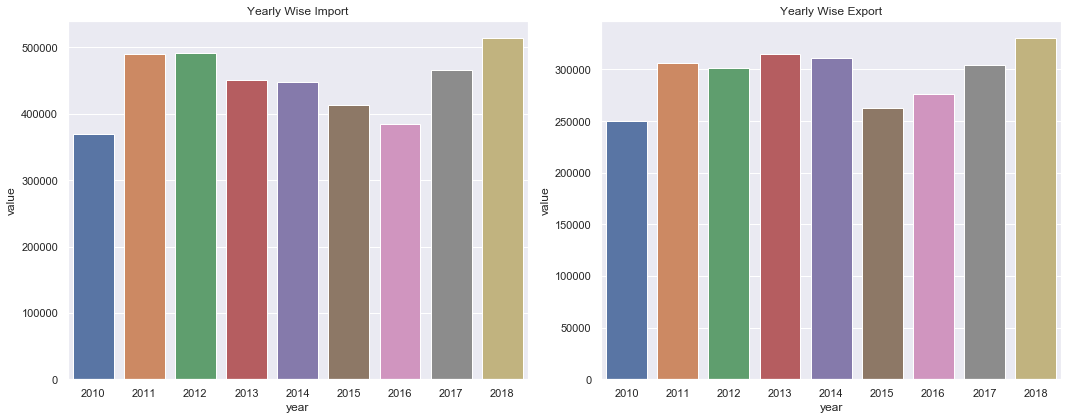

In [67]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = plt.subplot(121)
sns.barplot(yearly_import.index,yearly_import.value).set_title('Yearly Wise Import')

ax2 = plt.subplot(122)
sns.barplot(yearly_export.index,yearly_export.value).set_title('Yearly Wise Export')
plt.tight_layout()
plt.show()

### KEY OBSERVATIONS
* slowdown in trade between 2014 - 2015 .
* In 2013 it shows export was on increase but the import was decreasing.
* Export shows Sideway trend  till 2014 after sharp decline in 2015 the export shows an upward trend.
* Import increased 2010 to 2011 then it shows a downward trend till 2015 and later sharp upward trend 

## *Analyzing import & export Country wise*

In [68]:
country_import = df_import.groupby('country').agg({'value': 'sum'})
country_import = country_import.sort_values(by='value', ascending=False)
country_import = country_import[:10]
country_export = df_export.groupby('country').agg({'value': 'sum'})
country_export = country_export.sort_values(by='value', ascending=False)
country_export = country_export[:10]

## *Let's plot a graph using seaborn library for better visualization*

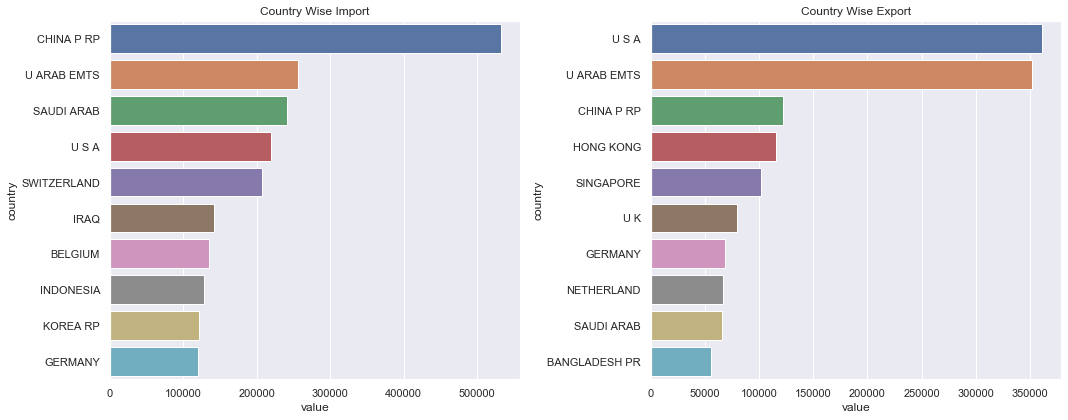

In [69]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = plt.subplot(121)
sns.barplot(country_import.value,country_import.index).set_title('Country Wise Import')

ax2 = plt.subplot(122)
sns.barplot(country_export.value,country_export.index).set_title('Country Wise Export')
plt.tight_layout()
plt.show()

### KEY OBSERVATION
* China has the biggest market in india followed by UAE,Saudi Arabia and USA
* USA is our biggest importer followed by UAE and China Republic.

**Trade Defecit/Surplus Top 5 country**
* China - very Huge Trade Deficit
* UAE - little Trade Surplus
* Saudi Arabia- Huge Trade Deficit
* USA - little Trade Surplus
* Swizerland - not making even in the top export graph showing sign of a Huge Trade Deficit.

## *Analyzing import & export Commodity wise*

In [70]:
comm_import = df_import.groupby('Commodity').agg({'value': 'sum'})
comm_import = comm_import.sort_values(by='value',ascending = False)
comm_import = comm_import[:10]
comm_export = df_export.groupby('Commodity').agg({'value': 'sum'})
comm_export = comm_export.sort_values(by='value',ascending = False)
comm_export = comm_export[:10]

## *Let's plot a graph using seaborn library for better visualization*

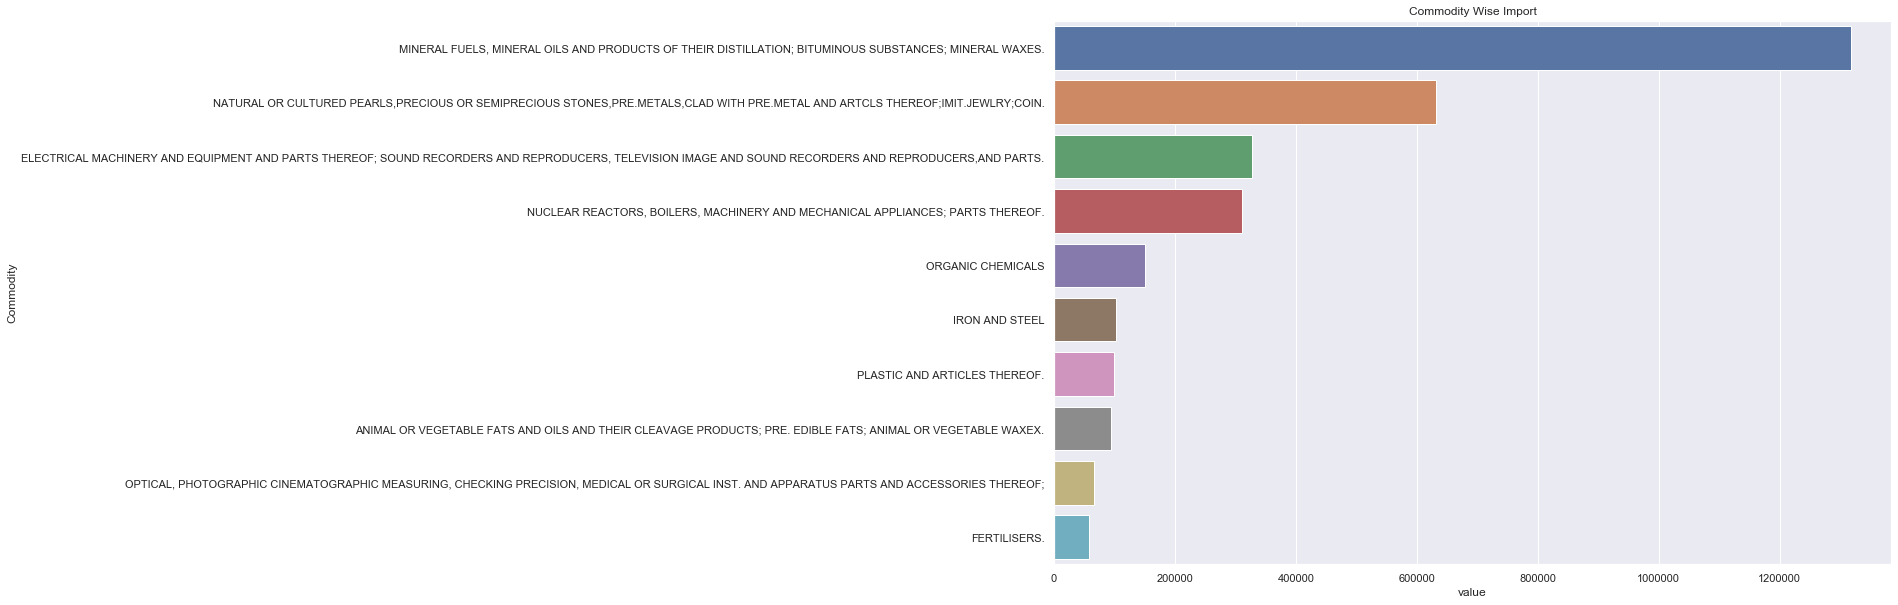

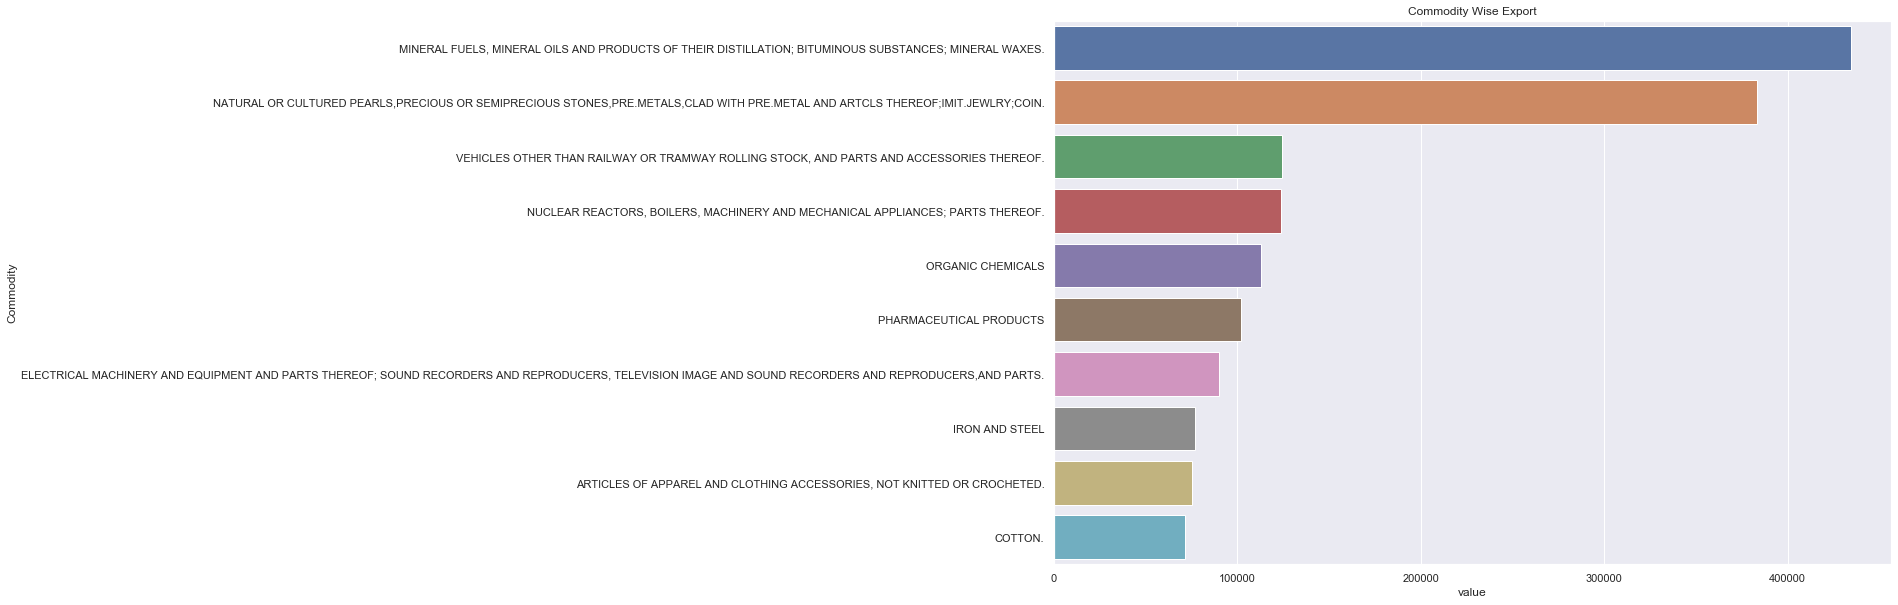

In [71]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(comm_import.value,comm_import.index).set_title('Commodity Wise Import')
plt.show()
sns.barplot(comm_export.value,comm_export.index).set_title('Commodity Wise Export')
plt.show()


### OBSERVATIONS
* Top exported categories are also the top imoported categories but there is huge trade deficit category wise. 
* Vehicle Other Than railway...and Pharmaceutical product HScode Chapters shows a trade surplus 

### Let's analyze Expensive IMPORTS

***As we have seen there is huge difference in distribution we will analyse some of the expensive imports***

In [72]:
expensive_import = df_import[df_import.value>1000]
expensive_import.head(10)

,HSCode,Commodity,value,country,year
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4012.00,ANGOLA,2018
142,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1720.46,ARGENTINA,2018
236,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",9664.58,AUSTRALIA,2018
701,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",6619.68,BELGIUM,2018
942,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1596.79,BRAZIL,2018
1215,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1165.81,CANADA,2018
1414,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1047.32,CHINA P RP,2018
1415,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1050.23,CHINA P RP,2018
1416,29,ORGANIC CHEMICALS,8596.25,CHINA P RP,2018


### *Let's plot a graph to better visualize outliers by plotting Import Value Vs HSCode(Commodity Code)*

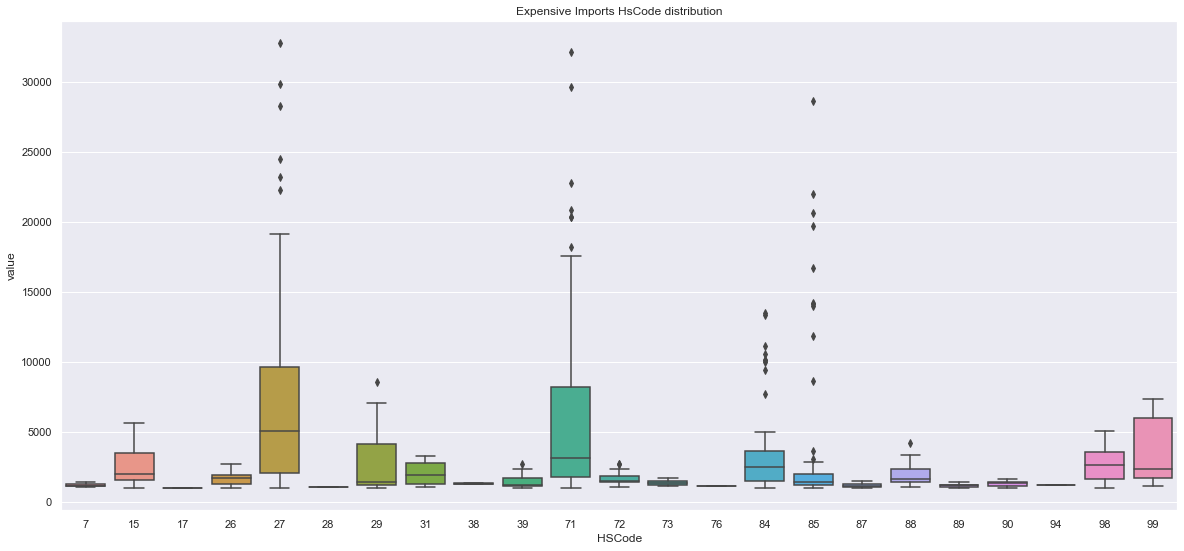

In [73]:
plt.figure(figsize=(20,9))

ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()

### OBSERVATIONS
* HSCode Chapter 27, 71 tops the expensive  import as already seen (Mineral Fuels and expensive jewellery)
* HSCode Chapter 15,29, 84, 85  also has a expensive imports.

#### Expensive import & HSCode

In [74]:
expImp_code = expensive_import.groupby('HSCode').agg({'value':'sum'})
expImp_code = dff.sort_values(by='value')

In [75]:
expImp_code

,value
HSCode,
17,1015.64
28,1050.23
76,1174.62
94,1200.90
38,2639.56
7,3646.10
87,8406.88
89,12077.09
73,12438.82


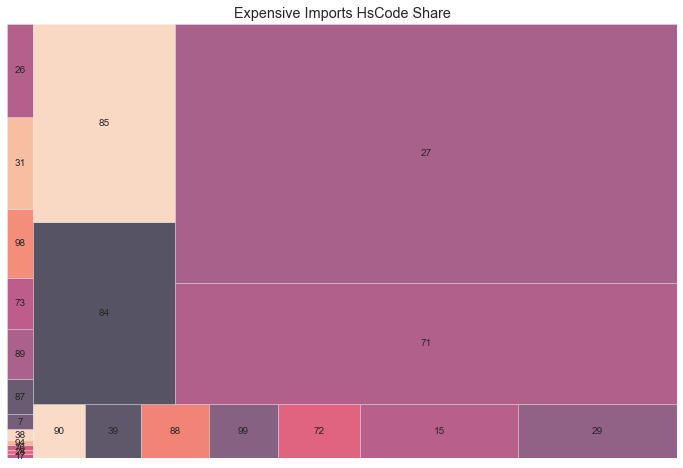

In [76]:
value = np.array(expImp_code)
commodity_code = expImp_code.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)
squarify.plot(sizes=value, label=commodity_code, alpha =.7)
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

### OBSERVATION
* The share of the HSCode category 27, 71, 85, 84 in expensive Category has most valuable imports

### COUNTRY ANALYSIS

In [77]:
len(expensive_import['country'].unique())

49

In [82]:
countExp_imp = expensive_import.groupby(['country']).agg({'value':'sum'})
countExp_imp = countExp_imp.sort_values(by='value')

## *Let's plot a graph using squarify for better visualization*

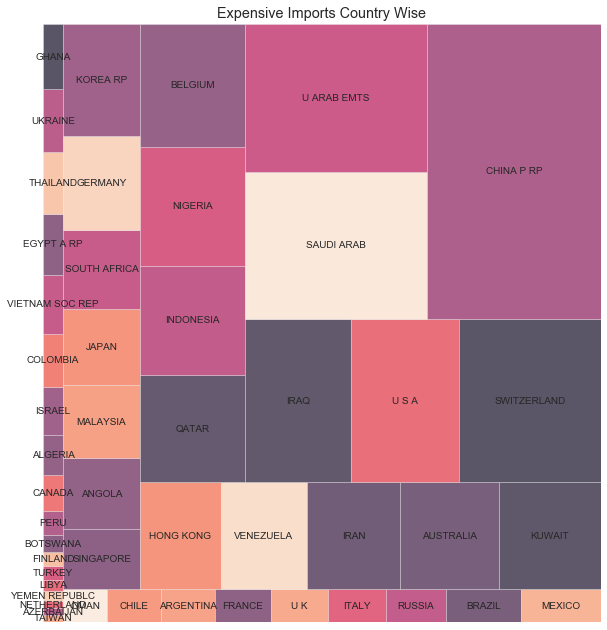

In [89]:
value = np.array(countExp_imp)
country = countExp_imp.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,11)
squarify.plot(sizes=value, label=country,alpha=0.7)
plt.title('Expensive Imports Country Wise')
plt.axis('off')
plt.show()

#### OBSERVATIONS
* Country Wise for Expensive Items China, Saudi Arab, UAE, Swizerland has most share followed by USA, Iraq

### ***Conclusive Comments***
* Need of the Hour is to reduce the trade deficit
* New Initiative taken by Goverment as "Skill India" , "Make In India", "Startup India" can help to boost the Export if the work is implemented on ground reality. 
* Bilateral ties between countries helps to reduce export duty which help the local company compete in global market.
* As India Primarily is a Agricultural Country training and Guiding and providing export quality crops/medicinal plant can help to boost agricultural export.

### Thankyou for your precious time :)

![](http://pluspng.com/img-png/animated-thank-you-png-for-powerpoint-copyright-2018-animations-media-960.gif)